In [1]:
%config Completer.use_jedi = False
import numpy as np
import sys,os
sys.path.append('../pyecog2')
sys.path.append('../pyecog2/coding_tests')
sys.path.append('../')
from ProjectClass import Project,FileBuffer
from pyecog2.main import MainModel
import json
import feature_extractor 
import importlib
from h5loader import H5File
importlib.reload(feature_extractor)
FeatureExtractor = feature_extractor.FeatureExtractor

/tmp/ipykernel_182401/458545178.py:11: RuntimeWarning: Mean of empty slice.
  seizures_mu  = seizures.mean(axis=0)
/home/mfpleite/anaconda3/envs/pyecog2PySide/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/tmp/ipykernel_182401/458545178.py:12: RuntimeWarning: invalid value encountered in true_divide
  seizures_cov = (seizures-seizures_mu).T.dot((seizures-seizures_mu))/seizures.shape[0]
/tmp/ipykernel_182401/3601062156.py:7: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 1d, C))
  LL[i] = scale - 0.5*(fdata[i,:]-mu)@(inv_cov[:,:] @(fdata[i,:]-mu).T)
/home/mfpleite/anaconda3/envs/pyecog2PySide/lib/python3.8/site-packages/numba/core/typing/npydecl.py:933: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 1d, C))
  warnings.warn(NumbaPerformanceWarning(msg))
/home/mfpleite/anacon

In [2]:
from ui_elements.FeatureExtractorGUI import FeatureExtractorWindow

In [3]:
class LambdaFunctionContainer():
    def __init__(self,flist):
        self.fnames = []
        for i,f in enumerate(flist):
            self.__dict__['f'+str(i)] = f
            self.fnames.append('f'+str(i))
        
    def my_worker(self,x):
        return[self.__dict__[f](x) for f in self.fnames]

def my_worker_init(container):
    global _container
    _container = container
    
def my_worker(x):
    return[_container.__dict__[f](x) for f in _container.fnames]

In [4]:
 a =1
    

In [5]:
container0 = LambdaFunctionContainer([lambda x: x ** 2,lambda x: x ** 4])
my_worker_init(container0)
my_worker(4)

[16, 256]

In [6]:
if 'b' not in locals():
    print('nope')

nope


In [7]:
def my_worker_flist_init(flist):
    global _flist
    _flist = flist
    
def my_worker_flist(x):
    return[f(x) for f in _flist]

In [8]:
_container

In [9]:

with Pool(None, initializer=my_worker_init, initargs=(container0,)) as p:
    print(p.map(my_worker, range(100)))

NameError: name 'Pool' is not defined

In [11]:

with Pool(None, initializer=my_worker_flist_init, initargs=([lambda x: x ** 2,lambda x: x ** 4],)) as p:
  print(p.map(my_worker_flist, range(100)))

[[0, 0], [1, 1], [4, 16], [9, 81], [16, 256], [25, 625], [36, 1296], [49, 2401], [64, 4096], [81, 6561], [100, 10000], [121, 14641], [144, 20736], [169, 28561], [196, 38416], [225, 50625], [256, 65536], [289, 83521], [324, 104976], [361, 130321], [400, 160000], [441, 194481], [484, 234256], [529, 279841], [576, 331776], [625, 390625], [676, 456976], [729, 531441], [784, 614656], [841, 707281], [900, 810000], [961, 923521], [1024, 1048576], [1089, 1185921], [1156, 1336336], [1225, 1500625], [1296, 1679616], [1369, 1874161], [1444, 2085136], [1521, 2313441], [1600, 2560000], [1681, 2825761], [1764, 3111696], [1849, 3418801], [1936, 3748096], [2025, 4100625], [2116, 4477456], [2209, 4879681], [2304, 5308416], [2401, 5764801], [2500, 6250000], [2601, 6765201], [2704, 7311616], [2809, 7890481], [2916, 8503056], [3025, 9150625], [3136, 9834496], [3249, 10556001], [3364, 11316496], [3481, 12117361], [3600, 12960000], [3721, 13845841], [3844, 14776336], [3969, 15752961], [4096, 16777216], [422

In [10]:
main_model = MainModel()
project=Project(main_model=main_model)
# project.load_from_json('/media/mfpleite/LaCie_1/ML_pyecog_2/AwesomeProject.pyecog')
project.load_from_json('/home/mfpleite/Documents/4Henry/multichannel_tests.pyecog')

('/home/mfpleite/Documents/4Henry', '/home/mfpleite/Documents/4Henry')

In [11]:
a = project.animal_list[0]

In [12]:
fb = FileBuffer(animal=a)

In [13]:
a.eeg_init_time[0]

1690661982

In [86]:
data,time = fb.get_data_from_range([a.eeg_init_time[0],a.eeg_init_time[0] + a.eeg_duration[0]])

In [87]:
data.shape

(1843200, 4)

In [16]:
fb.get_nchannels()

4

In [17]:
fdata = np.fft.rfft(data,axis=0)/len(data)

In [18]:
fdata.shape

(921601, 4)

In [19]:
fe = FeatureExtractor()
classifier_dir = project.project_file + '_classifier'
fe.load_settings(os.path.join(classifier_dir, '_feature_extractor.json'))

In [20]:
feature_extractor.powerf(1,2,ch=1)

<function feature_extractor.powerf.<locals>.<lambda>(fdata, fs)>

In [21]:
classifier_dir

'/home/mfpleite/Documents/4Henry/multichannel_tests.pyecog_classifier'

In [22]:
a = project.animal_list[0]

In [23]:
a.eeg_files[0]

'/home/mfpleite/Documents/4Henry/To_transfer/4_channel_hdf/M1690661982_2023-07-29-21-19-42_tids_[17, 18, 19, 20].meta'

In [24]:
a.eeg_duration[0]

3600

In [90]:
[(a.eeg_files[i], a.eeg_duration[i]) for i in range(0,10)]

[('/home/mfpleite/Documents/4Henry/To_transfer/4_channel_hdf/M1690661982_2023-07-29-21-19-42_tids_[17, 18, 19, 20].meta',
  3600),
 ('/home/mfpleite/Documents/4Henry/To_transfer/4_channel_hdf/M1690665583_2023-07-29-22-19-43_tids_[17, 18, 19, 20].meta',
  3600),
 ('/home/mfpleite/Documents/4Henry/To_transfer/4_channel_hdf/M1690669184_2023-07-29-23-19-44_tids_[17, 18, 19, 20].meta',
  3600),
 ('/home/mfpleite/Documents/4Henry/To_transfer/4_channel_hdf/M1690672785_2023-07-30-00-19-45_tids_[17, 18, 19, 20].meta',
  3600),
 ('/home/mfpleite/Documents/4Henry/To_transfer/4_channel_hdf/M1690676386_2023-07-30-01-19-46_tids_[17, 18, 19, 20].meta',
  3600),
 ('/home/mfpleite/Documents/4Henry/To_transfer/4_channel_hdf/M1690679987_2023-07-30-02-19-47_tids_[17, 18, 19, 20].meta',
  3600),
 ('/home/mfpleite/Documents/4Henry/To_transfer/4_channel_hdf/M1690683588_2023-07-30-03-19-48_tids_[17, 18, 19, 20].meta',
  3600),
 ('/home/mfpleite/Documents/4Henry/To_transfer/4_channel_hdf/M1690687189_2023-07-30

In [91]:
for animal in project.animal_list[-1:]:
    fe.extract_features_from_animal(animal,re_write = True)

Extracting features for animal 4_channel_hdf


In [92]:
import time

In [93]:
time.gmtime()

time.struct_time(tm_year=2023, tm_mon=9, tm_mday=18, tm_hour=9, tm_min=42, tm_sec=57, tm_wday=0, tm_yday=261, tm_isdst=0)

In [94]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [95]:
annotation0 = project.current_animal.annotations.annotations_list[0]
it = project.current_animal.eeg_init_time
index = [i  for i in range(len(it)) if (0<(annotation0.getStart()-it[i])<3600) ][0]
fname = '.'.join(project.current_animal.eeg_files[index].split('.')[:-1]+['features'])
f_vec = np.fromfile(fname,dtype='float64')

In [96]:
fmeta_file = '.'.join(project.current_animal.eeg_files[index].split('.')[:-1] + ['fmeta'])
fmeta_dict = json.load(open(fmeta_file))
print(fmeta_file)

/home/mfpleite/Documents/4Henry/To_transfer/4_channel_hdf/M1690683588_2023-07-30-03-19-48_tids_[17, 18, 19, 20].fmeta


In [97]:
fmeta_dict

{'channel_labels': ['ch0 log std',
  'ch0 kurtosis',
  'ch0 skewness',
  'ch0 log coastline (log sum of abs diff)',
  'ch1 log std',
  'ch1 kurtosis',
  'ch1 skewness',
  'ch1 log coastline (log sum of abs diff)',
  'ch2 log std',
  'ch2 kurtosis',
  'ch2 skewness',
  'ch2 log coastline (log sum of abs diff)',
  'ch3 log std',
  'ch3 kurtosis',
  'ch3 skewness',
  'ch3 log coastline (log sum of abs diff)',
  'ch0 log power in band (1, 4) Hz',
  'ch0 log power in band (4, 8) Hz',
  'ch0 log power in band (8, 12) Hz',
  'ch0 log power in band (12, 30) Hz',
  'ch0 log power in band (30, 50) Hz',
  'ch0 log power in band (50, 120) Hz',
  'ch0 Spectrum entropy',
  'ch1 log power in band (1, 4) Hz',
  'ch1 log power in band (4, 8) Hz',
  'ch1 log power in band (8, 12) Hz',
  'ch1 log power in band (12, 30) Hz',
  'ch1 log power in band (30, 50) Hz',
  'ch1 log power in band (50, 120) Hz',
  'ch1 Spectrum entropy',
  'ch2 log power in band (1, 4) Hz',
  'ch2 log power in band (4, 8) Hz',
  'c

In [98]:
fe.number_of_features

50

In [99]:
fe.settings

{'feature_freq_functions': ['fe.powerf(1, 4, ch=0)',
  'fe.powerf(4, 8, ch=0)',
  'fe.powerf(8, 12, ch=0)',
  'fe.powerf(12, 30, ch=0)',
  'fe.powerf(30, 50, ch=0)',
  'fe.powerf(50, 120, ch=0)',
  'fe.reg_entropy_ch(0)',
  'fe.powerf(1, 4, ch=1)',
  'fe.powerf(4, 8, ch=1)',
  'fe.powerf(8, 12, ch=1)',
  'fe.powerf(12, 30, ch=1)',
  'fe.powerf(30, 50, ch=1)',
  'fe.powerf(50, 120, ch=1)',
  'fe.reg_entropy_ch(1)',
  'fe.powerf(1, 4, ch=2)',
  'fe.powerf(4, 8, ch=2)',
  'fe.powerf(8, 12, ch=2)',
  'fe.powerf(12, 30, ch=2)',
  'fe.powerf(30, 50, ch=2)',
  'fe.powerf(50, 120, ch=2)',
  'fe.reg_entropy_ch(2)',
  'fe.powerf(1, 4, ch=3)',
  'fe.powerf(4, 8, ch=3)',
  'fe.powerf(8, 12, ch=3)',
  'fe.powerf(12, 30, ch=3)',
  'fe.powerf(30, 50, ch=3)',
  'fe.powerf(50, 120, ch=3)',
  'fe.reg_entropy_ch(3)',
  'fe.fband_corr(1, 120, 0, 1)',
  'fe.fband_corr(1, 120, 0, 2)',
  'fe.fband_corr(1, 120, 0, 3)',
  'fe.fband_corr(1, 120, 1, 2)',
  'fe.fband_corr(1, 120, 1, 3)',
  'fe.fband_corr(1, 120, 

In [100]:
f_vec = f_vec.reshape((-1,fe.number_of_features))
f_vec_n = f_vec

In [101]:
f_vec_n = f_vec-np.mean(f_vec,axis=0)
f_vec_n = f_vec_n/np.std(f_vec_n,axis = 0)

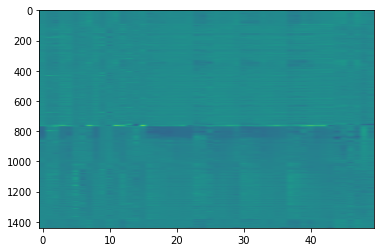

In [102]:
plt.imshow(f_vec_n,aspect='auto')

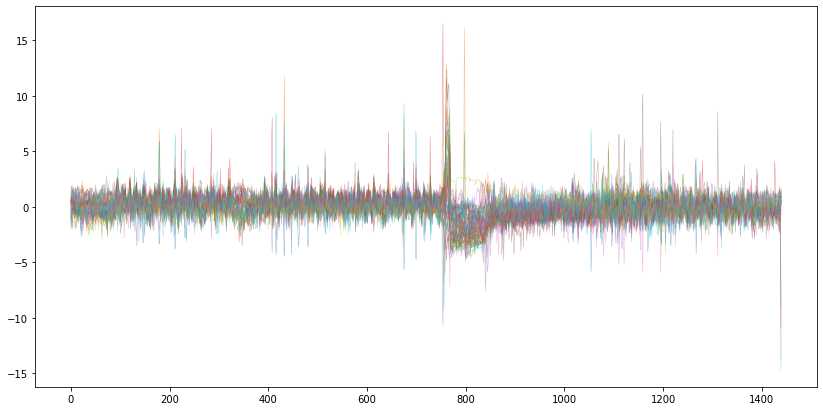

In [103]:
plt.figure(figsize=(14,7))
plt.plot(f_vec_n,alpha=.5,linewidth=.5);

In [104]:
import spectrotools as spec
importlib.reload(spec)

<module 'spectrotools' from '/home/mfpleite/PycharmProjects/pyecog2/Notebooks/../pyecog2/spectrotools.py'>

[Text(0, 0, 'ch0 log std'),
 Text(0, -1, 'ch0 kurtosis'),
 Text(0, -2, 'ch0 skewness'),
 Text(0, -3, 'ch0 log coastline (log sum of abs diff)'),
 Text(0, -4, 'ch1 log std'),
 Text(0, -5, 'ch1 kurtosis'),
 Text(0, -6, 'ch1 skewness'),
 Text(0, -7, 'ch1 log coastline (log sum of abs diff)'),
 Text(0, -8, 'ch2 log std'),
 Text(0, -9, 'ch2 kurtosis'),
 Text(0, -10, 'ch2 skewness'),
 Text(0, -11, 'ch2 log coastline (log sum of abs diff)'),
 Text(0, -12, 'ch3 log std'),
 Text(0, -13, 'ch3 kurtosis'),
 Text(0, -14, 'ch3 skewness'),
 Text(0, -15, 'ch3 log coastline (log sum of abs diff)'),
 Text(0, -16, 'ch0 log power in band (1, 4) Hz'),
 Text(0, -17, 'ch0 log power in band (4, 8) Hz'),
 Text(0, -18, 'ch0 log power in band (8, 12) Hz'),
 Text(0, -19, 'ch0 log power in band (12, 30) Hz'),
 Text(0, -20, 'ch0 log power in band (30, 50) Hz'),
 Text(0, -21, 'ch0 log power in band (50, 120) Hz'),
 Text(0, -22, 'ch0 Spectrum entropy'),
 Text(0, -23, 'ch1 log power in band (1, 4) Hz'),
 Text(0, -24, 

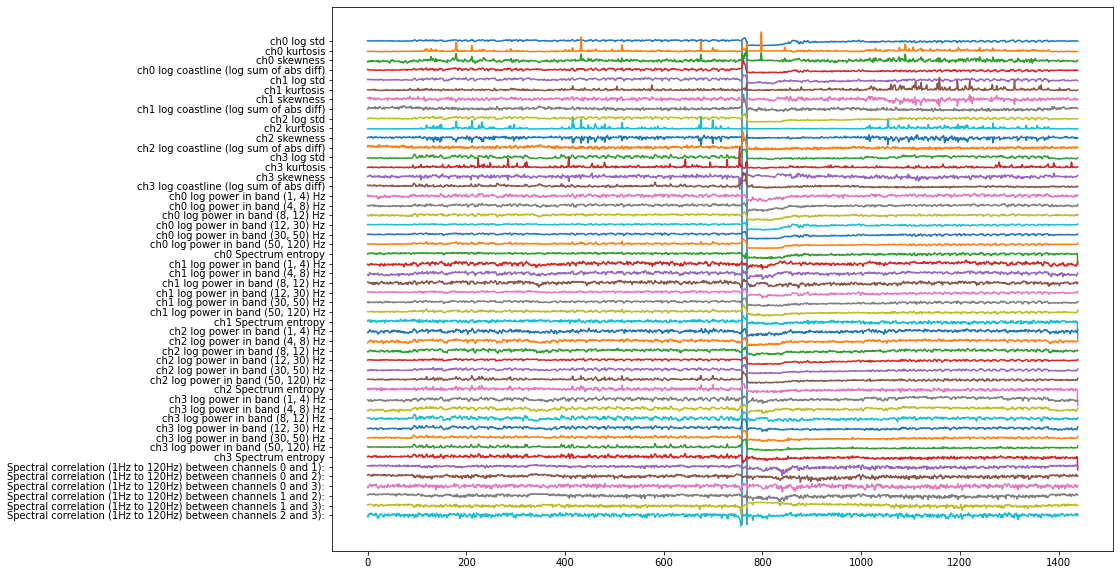

In [105]:
starts = [(annotation0.getStart()-it[index])/2.5 for annotation0 in project.current_animal.annotations.annotations_list]
ends = [(annotation0.getEnd()-it[index])/2.5 for annotation0 in project.current_animal.annotations.annotations_list]

f = plt.figure(figsize=(14,10))
ax = f.gca()
spec.plot_spread(f_vec_n,.5);

# plt.xlim([400,1000])
plt.vlines(starts[0:],-fe.number_of_features,0)
plt.vlines(ends[0:],-fe.number_of_features,0)
ax.set_yticks(range(0,-fe.number_of_features,-1))
ax.set_yticklabels(fe.settings['feature_labels'])

In [71]:
range(fe.number_of_features)

range(0, 50)

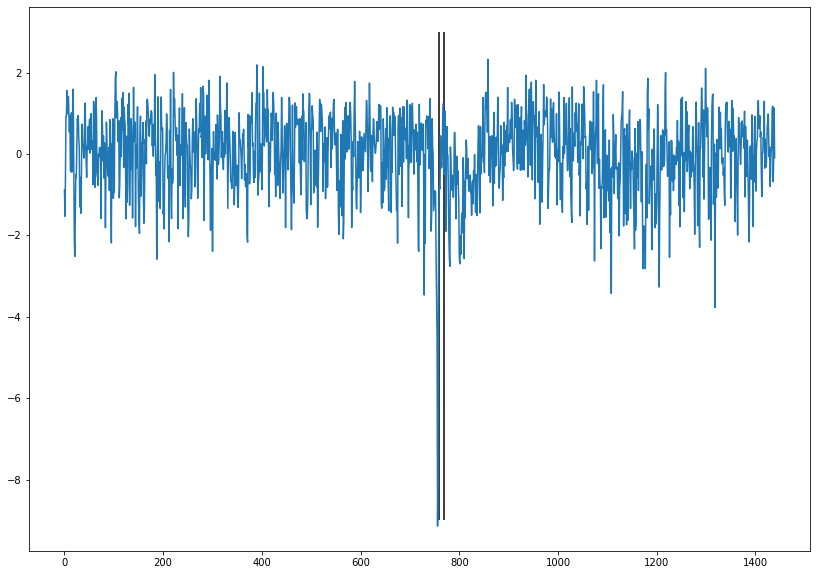

In [76]:

plt.figure(figsize=(14,10))
plt.plot(f_vec_n[:,-1]);
# plt.xlim([400,1000])
plt.vlines(starts[0:],-9,3,'k')
plt.vlines(ends[0:],-9,3,'k')

In [77]:
from numba import jit, njit
import timeit

In [78]:
@jit(nopython=True)
def reg_entropy_jit(fdata,fs):
    # regularized entropy of spectral data
    # fdata comes from rfft
    fdata_x_f = np.abs(fdata.ravel())*np.arange(1,len(fdata)+1)
    # print('fdata shape:',fdata_x_f.shape)
    fdata_x_f = fdata_x_f+1e-9*np.max(fdata_x_f)
    fdata_x_f = fdata_x_f**2/np.sum(fdata_x_f**2)
    return -np.sum(fdata_x_f*np.log(fdata_x_f))

# @jit(nopython=True)
def reg_entropy(fdata,fs):
    # regularized entropy of spectral data
    # fdata comes from rfft
    fdata_x_f = np.abs(fdata.ravel())*np.arange(1,len(fdata)+1)
    # print('fdata shape:',fdata_x_f.shape)
    fdata_x_f = fdata_x_f+1e-9*np.max(fdata_x_f)
    fdata_x_f = fdata_x_f**2/np.sum(fdata_x_f**2)
    return -np.sum(fdata_x_f*np.log(fdata_x_f))

In [79]:
# %%timeit
reg_entropy(np.random.randn(512*5,1),512)

6.678750726401875

In [80]:
# %%timeit
reg_entropy_jit(np.random.randn(512*5,1),512)

6.676548196709914

In [81]:
fb = FileBuffer(project.current_animal)

In [82]:
data,t =fb.get_data_from_range([1569851359, 1569851359+3600])

In [88]:

from scipy.signal import stft, get_window
vf,t,z = stft(data.T,fs = 1/(t[10]-t[9]),nperseg=512*5,window='boxcar')

IndexError: index 10 is out of bounds for axis 0 with size 0

In [106]:
t

array([], shape=(0, 1), dtype=float64)

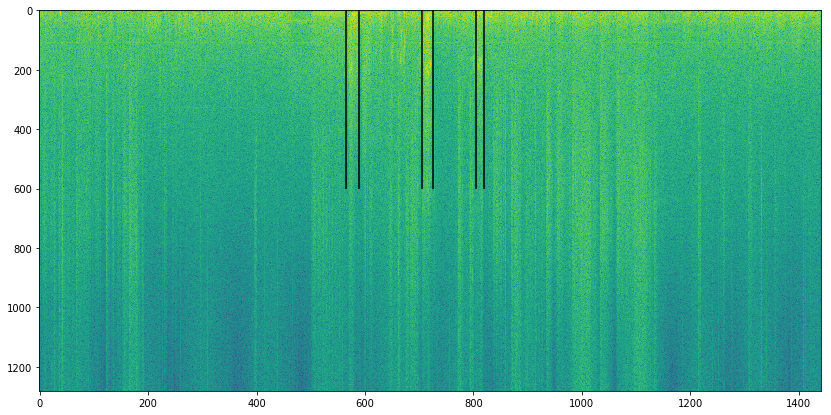

In [36]:
plt.figure(figsize=(14,7))
plt.imshow(np.log(np.abs(z[0])),aspect='auto')
# plt.ylim(0,200)

# plt.xlim(1000,1500)
plt.vlines(starts[1:],600,0)
plt.vlines(ends[1:],600,0)

In [37]:
z.shape

(1, 1281, 1441)

In [38]:
k=1
fdata_x_f = np.abs(z[0,k:,:])*np.arange(k,512*5/2+1)[:,np.newaxis]
# print('fdata shape:',fdata_x_f.shape)
fdata_x_f = fdata_x_f+1e-9*np.max(fdata_x_f)
fdata_x_f = fdata_x_f**2/np.sum(fdata_x_f**2,axis=0)[np.newaxis,:]
# fdata_x_f = fdata_x_f**4/np.sum(fdata_x_f**4,axis=0)[np.newaxis,:]

In [39]:
fdata_x_f.dtype

dtype('float64')

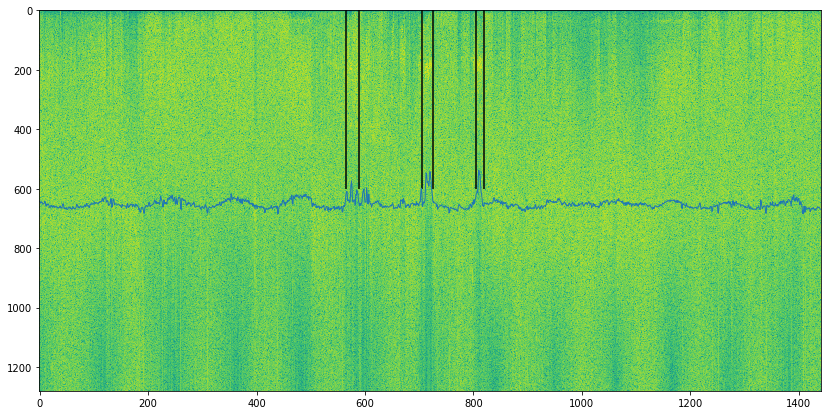

In [40]:
plt.figure(figsize=(14,7))
plt.imshow(np.log(fdata_x_f),aspect='auto')
# plt.ylim(0,200)
# plt.xlim(1000,1500)

plt.plot(-np.sum(100*fdata_x_f*np.log(fdata_x_f),axis=0),linewidth=1)
plt.vlines(starts[1:],600,0)
plt.vlines(ends[1:],600,0)

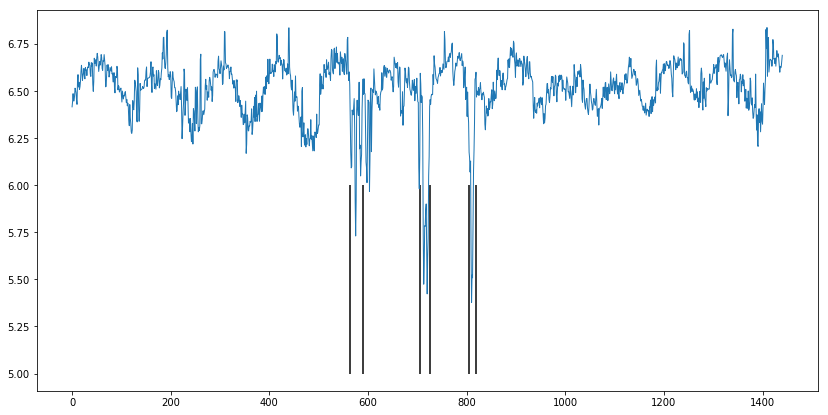

In [41]:
plt.figure(figsize=(14,7))
plt.plot(-np.sum(fdata_x_f*np.log(fdata_x_f),axis=0),linewidth=1)
# plt.xlim(5000,6000)

# plt.xlim(1000,1500)

plt.vlines(starts[1:],6,5)
plt.vlines(ends[1:],6,5)

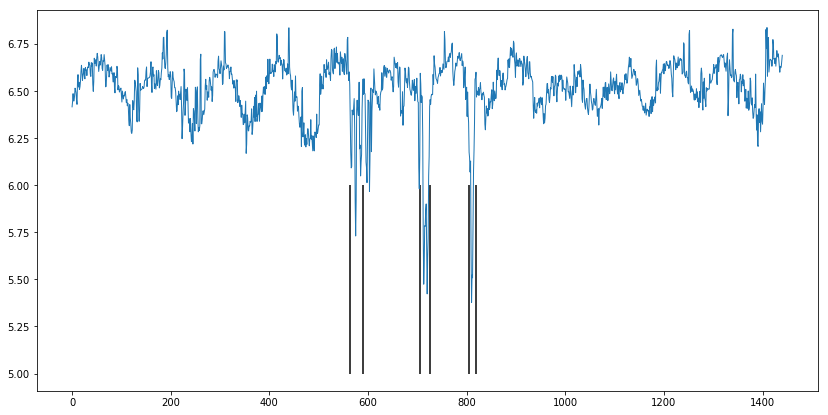

In [42]:
plt.figure(figsize=(14,7))
plt.plot(-np.sum(fdata_x_f*np.log(fdata_x_f),axis=0),linewidth=1)
# plt.xlim(5000,6000)

# plt.xlim(1000,1500)

plt.vlines(starts[1:],6,5)
plt.vlines(ends[1:],6,5)

In [45]:
from sklearn.decomposition import PCA


In [46]:
list(map(np.shape,[np.zeros(f_vec_n.shape[1]),np.diff(f_vec_n,axis=0)]))

[(50,), (1439, 50)]

In [84]:
pca = PCA(n_components=2)
f_vec_nd  = np.hstack([f_vec_n,np.vstack([np.zeros(f_vec_n.shape[1]),np.diff(f_vec_n,axis=0)])])
f_vec_nd  = np.hstack([f_vec_n])


f_vec_n_p = pca.fit_transform(f_vec_nd)

In [85]:
pca.components_@f_vec_d

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1440 is different from 50)

In [66]:
f_vec_n.shape

(1440, 15)

In [67]:
f_vec_n_p.shape

(1440, 2)

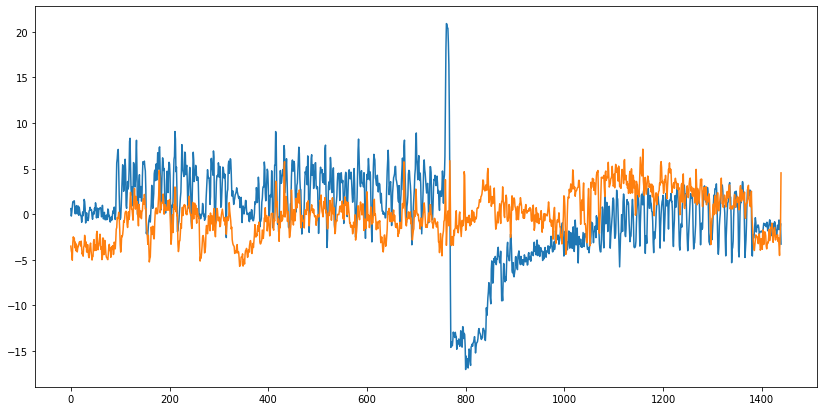

In [50]:
plt.figure(figsize=(14,7))
plt.plot(f_vec_n_p)
plt.vlines(starts[1:],-10,0)
plt.vlines(ends[1:],-10,0)

(-5.0, 5.0)

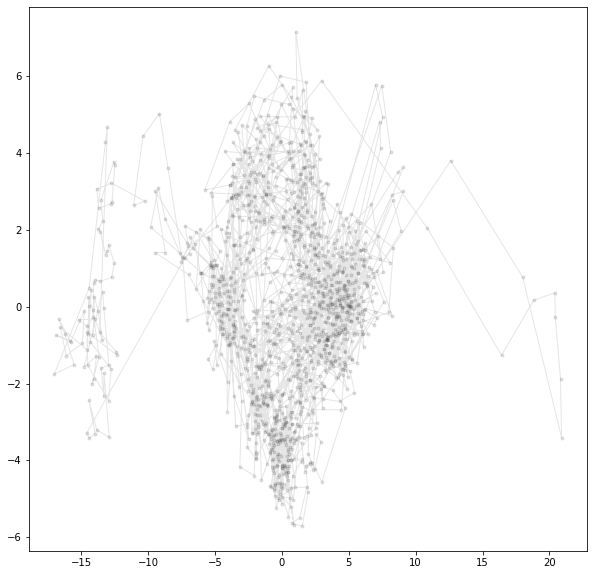

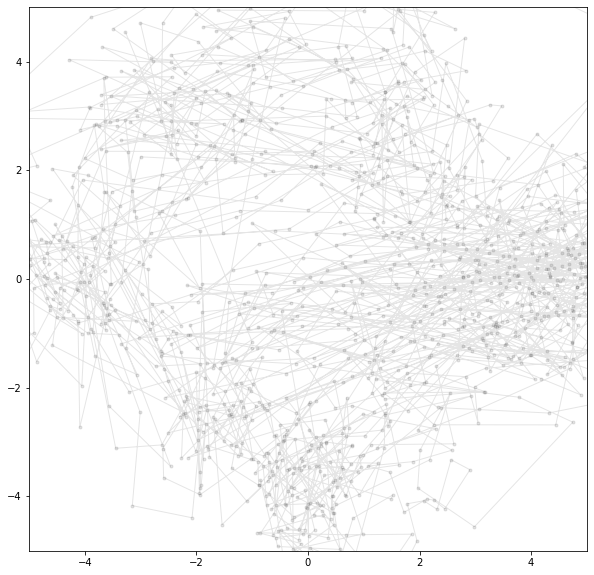

In [51]:
# f_vec_n_p = np.sign(f_vec_n_p)*np.sqrt(np.abs(f_vec_n_p))
plt.figure(figsize=(10,10))
plt.plot(f_vec_n_p[:,0],f_vec_n_p[:,1],'.-',linewidth=1,alpha=.1,color=[0,0,0])

for i in range(len(starts)-1) :
    s = int(starts[i+1])
    e = int(ends[i+1])
    color = [0,0,0]
    color[i%3]=1
    print(i,color)
    plt.plot(f_vec_n_p[s:e,0],f_vec_n_p[s:e,1],'.-',linewidth=1,alpha=.5,color=color)

plt.figure(figsize=(10,10))
plt.plot(f_vec_n_p[:,0],f_vec_n_p[:,1],'.-',linewidth=1,alpha=.1,color=[0,0,0])
67
for i in range(len(starts)-1) :
    s = int(starts[i+1])
    e = int(ends[i+1])
    color = [0,0,0]
    color[i%3]=1
    print(i,color)
    plt.plot(f_vec_n_p[s:e,0],f_vec_n_p[s:e,1],'.-',linewidth=1,alpha=.5,color=color)
plt.xlim(-5,5)
plt.ylim(-5,5)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

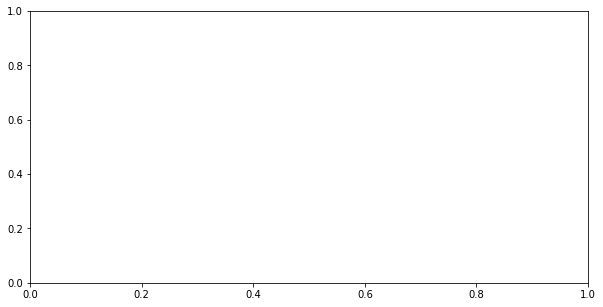

In [52]:
plt.figure(figsize=(10,5))
plt.barh(np.arange(15)-.2,pca.components_[0,:],height=.4);
plt.barh(np.arange(15)+.2,pca.components_[1,:],height=.4);
ax=plt.gca()
ax.set_yticks(range(0,fe.number_of_features,1))
ax.set_yticklabels(fe.settings['feature_labels'])
plt.grid()

In [51]:
pca.components_[0,:].shape


(30,)

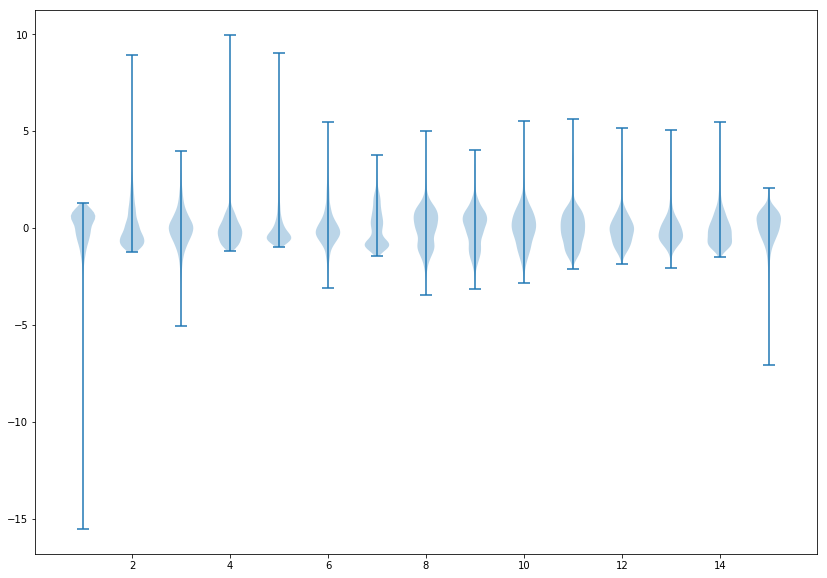

In [52]:
plt.figure(figsize=(14,10))
plt.violinplot(f_vec_n);

In [113]:
f_labels = np.zeros(len(f_vec_n),dtype='bool')
for i in range(len(starts)) :
    s = int(starts[i])
    e = int(ends[i])
    f_labels[s:e] = 1


In [119]:
np.sum(f_labels)

11

In [120]:
f_vec_d  = np.hstack([f_vec,np.vstack([np.zeros(f_vec.shape[1]),np.diff(f_vec,axis=0)])])
f_vec_d  = f_vec
f_vec_d = f_vec_d-np.mean(f_vec_d,axis=0)
f_vec_d = f_vec_d/np.std(f_vec_d,axis = 0)

blanks = f_vec_d#[(1-f_labels).nonzero()[0],:]
seizures = f_vec_d[(f_labels).nonzero()[0],:]

blanks_mu  = blanks.mean(axis=0)
blanks_cov = (blanks-blanks_mu).T.dot((blanks-blanks_mu))/blanks.shape[0]
seizures_mu  = seizures.mean(axis=0)
seizures_cov = (seizures-seizures_mu).T.dot((seizures-seizures_mu))/seizures.shape[0]

In [116]:
f_vec_d.shape

(1440, 50)

In [124]:
seizures.shape

(11, 50)

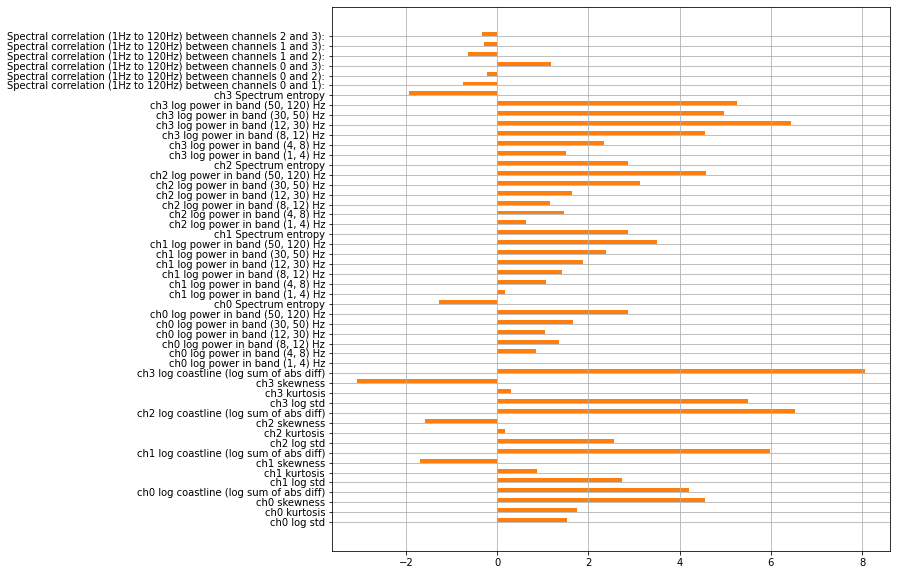

In [117]:
plt.figure(figsize=(10,10))
plt.barh(np.arange(len(seizures_mu))-.2,blanks_mu,height=.4);
plt.barh(np.arange(len(seizures_mu))+.2,seizures_mu,height=.4);
ax=plt.gca()
# ax.set_yticks(list(range(0,fe.number_of_features,1)) + 
#               list(range(fe.number_of_features,2*fe.number_of_features,1)))
# ax.set_yticklabels(fe.settings['feature_labels'] + ['d'+s+'/dt' for s in fe.settings['feature_labels']])
ax.set_yticks(list(range(0,fe.number_of_features,1)))
ax.set_yticklabels(fe.settings['feature_labels'])
plt.grid()

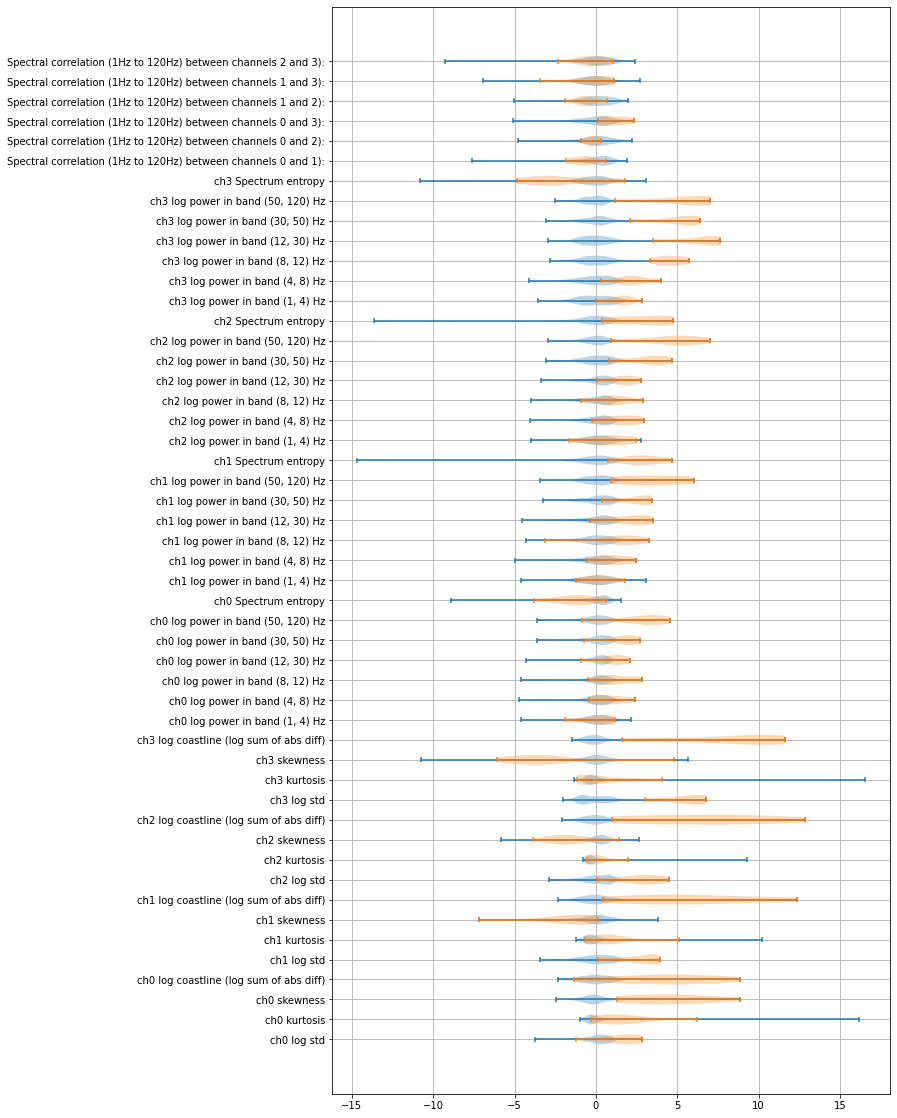

In [125]:
plt.figure(figsize=(10,20))
plt.violinplot(blanks,vert=False);
plt.violinplot(seizures,vert=False);
ax=plt.gca()
# ax.set_yticks(list(range(1,fe.number_of_features+1,1)) + 
#               list(range(fe.number_of_features+1,2*fe.number_of_features+1,1)))
# ax.set_yticklabels(fe.settings['feature_labels'] + ['d'+s+'/dt' for s in fe.settings['feature_labels']])
ax.set_yticks(list(range(1,fe.number_of_features+1,1)))
ax.set_yticklabels(fe.settings['feature_labels'])
plt.grid()

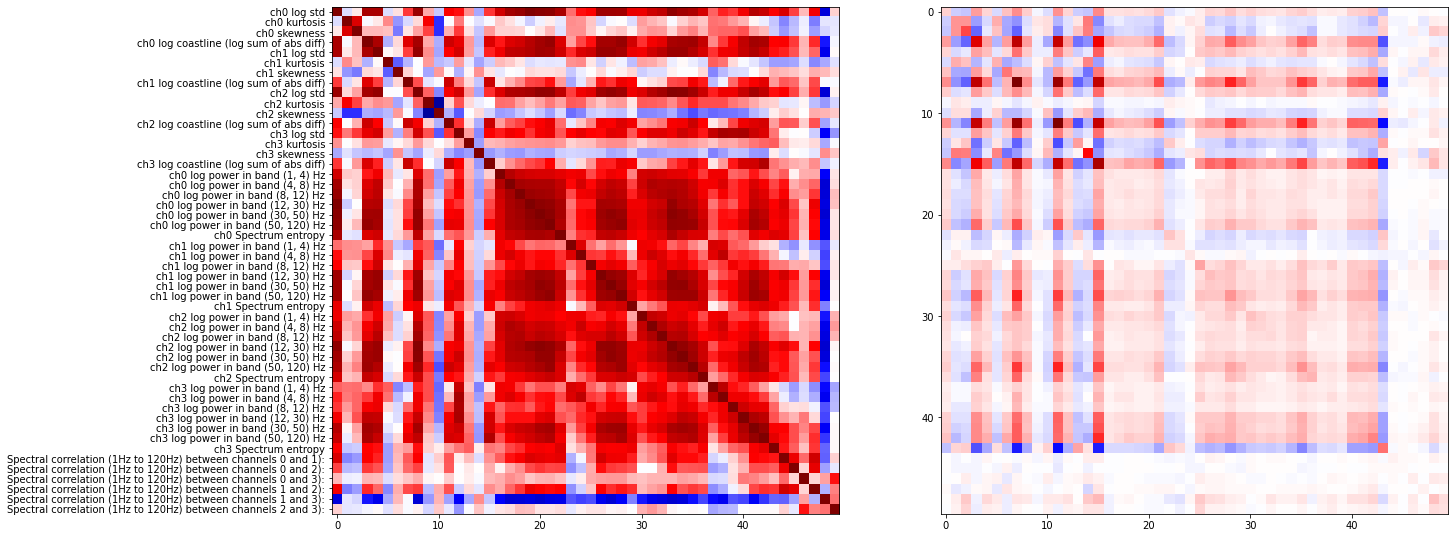

In [140]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(blanks_cov,cmap='seismic',vmin=-np.max(np.abs(blanks_cov)),vmax=np.max(np.abs(blanks_cov)))
ax=plt.gca()
ax.set_yticks(list(range(0,fe.number_of_features,1)))
ax.set_yticklabels(fe.settings['feature_labels'])
plt.subplot(1,2,2)
plt.imshow(seizures_cov,cmap='seismic',vmin=-np.max(np.abs(seizures_cov)),vmax=np.max(np.abs(seizures_cov)))

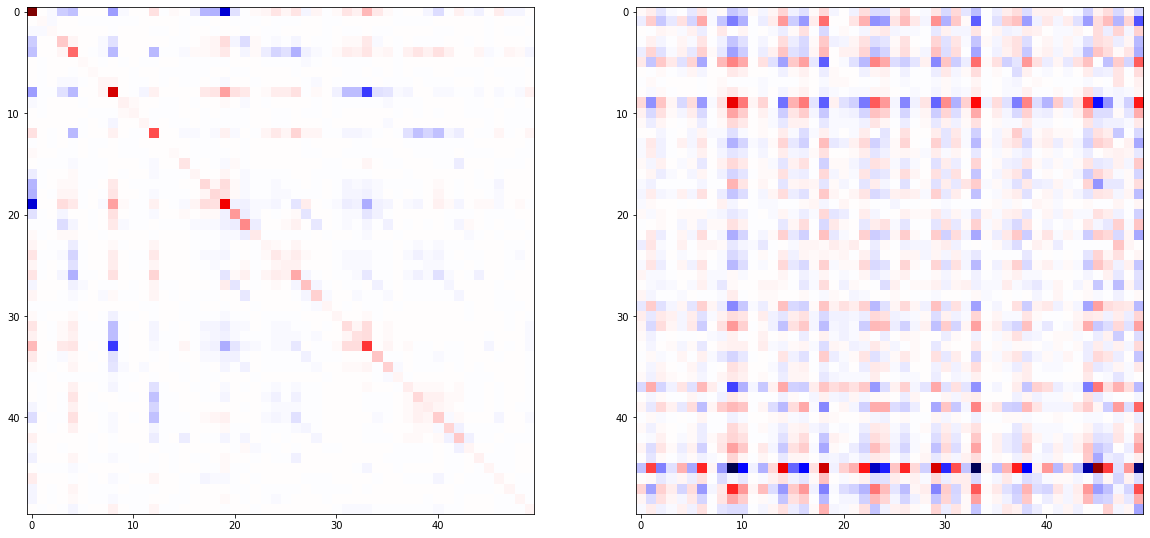

In [127]:
blanks_cov_i = np.linalg.inv(blanks_cov)
seizures_cov_i = np.linalg.inv(seizures_cov)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(blanks_cov_i,cmap='seismic',vmin=-np.max(np.abs(blanks_cov_i)),vmax=np.max(np.abs(blanks_cov_i)))
plt.subplot(1,2,2)
plt.imshow(seizures_cov_i,cmap='seismic',vmin=-np.max(np.abs(seizures_cov_i)),vmax=np.max(np.abs(seizures_cov_i)))

In [128]:
@jit(nopython=True)
def MVGD_LL_jit(fdata,mu,inv_cov,LL,no_scale):
    k = fdata.shape[1]
    N = fdata.shape[0]
    scale = (1-no_scale)*((-k/2)*np.log(2*np.pi)+1/2*np.log(np.linalg.det(inv_cov[:,:])))
    for i in range(N):
        LL[i] = scale - 0.5*(fdata[i,:]-mu)@(inv_cov[:,:] @(fdata[i,:]-mu).T)

def MVGD_LL(fdata,mu,inv_cov,no_scale = False):
    LL = np.zeros(fdata.shape[0])
    MVGD_LL_jit(fdata,mu,inv_cov,LL, no_scale)
    return LL

In [129]:
b_LLc = b_LL
s_LLc = s_LL

NameError: name 'b_LL' is not defined

(400.0, 1000.0)

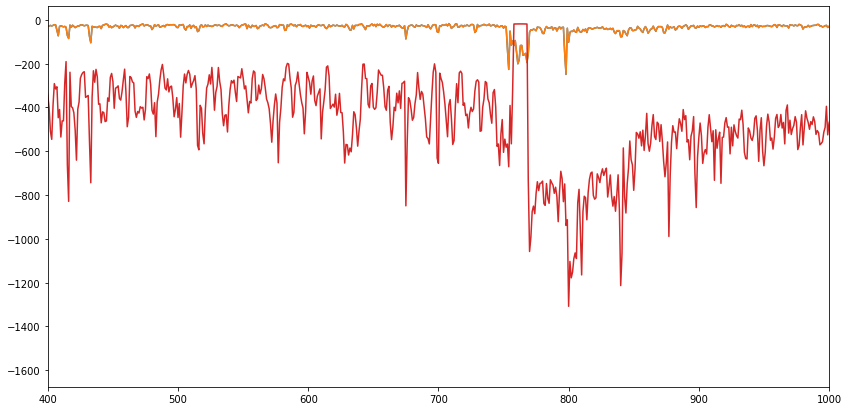

In [130]:
blanks_cov_i = np.linalg.inv(blanks_cov)
blanks_cov_ir = np.linalg.inv(blanks_cov+np.eye(len(blanks_cov))*blanks_cov.diagonal()/len(blanks))

seizures_cov_i = np.linalg.inv(seizures_cov)
seizures_cov_ir = np.linalg.inv(seizures_cov+np.eye(len(seizures_cov))*seizures_cov.diagonal()/len(seizures))

b_LL = MVGD_LL(f_vec_d,blanks_mu,blanks_cov_i)
s_LL = MVGD_LL(f_vec_d,seizures_mu,seizures_cov_i)
b_LLr = MVGD_LL(f_vec_d,blanks_mu,blanks_cov_ir)
s_LLr = MVGD_LL(f_vec_d,seizures_mu,seizures_cov_ir)

plt.figure(figsize=(14,7))
plt.plot(b_LL)
plt.plot(b_LLr)
plt.plot(s_LL)
plt.plot(s_LLr)
plt.vlines(starts[1:],-1000,0,linestyles=':')
plt.vlines(ends[1:],-1000,0,linestyles=':')
plt.xlim(400,1000)

In [131]:
from scipy import stats

In [132]:
blanks_LL = MVGD_LL(blanks,blanks_mu,blanks_cov_i,no_scale=True)
seizures_LL = MVGD_LL(seizures,seizures_mu,seizures_cov_i,no_scale=True)

In [133]:
blanks_cov_i.shape

(50, 50)

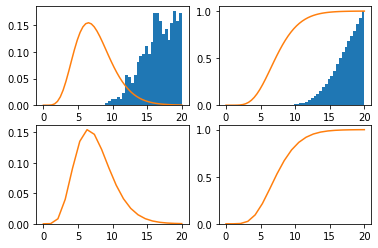

In [135]:
x = np.linspace(0,20,50)
chi2 = stats.chi2.pdf(x,15,scale=0.5)
plt.figure()
plt.subplot(221)
plt.hist(-blanks_LL,bins = x,density = True);
plt.plot(x,chi2)

cum_chi2 = stats.chi2.cdf(x,15,scale=0.5)
plt.subplot(222)
plt.hist(-blanks_LL,bins = x,density = True,cumulative=True);
plt.plot(x,cum_chi2)

x = np.linspace(0,20,20)
chi2 = stats.chi2.pdf(x,15,scale=0.5)
# plt.figure()
plt.subplot(223)
plt.hist(-seizures_LL,bins=x,density=True);
plt.plot(x,chi2)

cum_chi2 = stats.chi2.cdf(x,15,scale=0.5)
plt.subplot(224)
plt.hist(-seizures_LL,bins = x,density = True,cumulative=True);
plt.plot(x,cum_chi2)

(400.0, 1000.0)

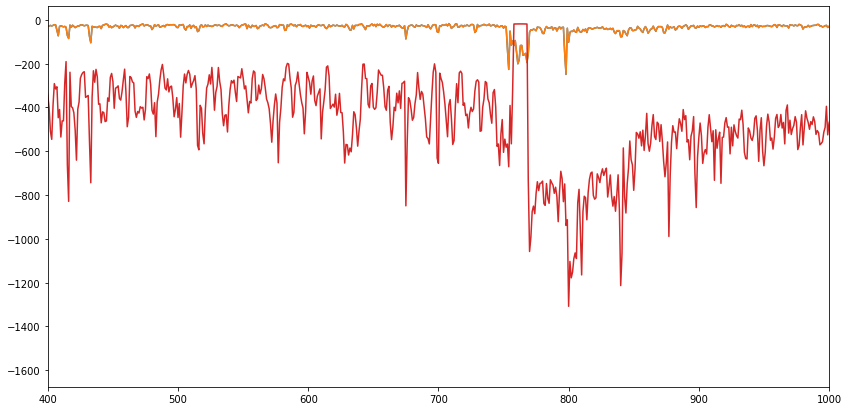

In [136]:
plt.figure(figsize=(14,7))
plt.plot(b_LL)
plt.plot(b_LLr)
plt.plot(s_LL)
plt.plot(s_LLr)
plt.vlines(starts[1:],-500,0,linestyles=':')
plt.vlines(ends[1:],-500,0,linestyles=':')
plt.xlim(400,1000)

In [59]:
@jit(nopython=True)
def LL2prob_jit(LL,prob):
    for i in range(LL.shape[0]):
        v = np.exp(LL[i,:])
        prob[i,:] = v / np.sum(v)
        
def LL2prob(LL):
    prob = np.zeros(LL.shape)
    LL2prob_jit(LL,prob)
    return prob

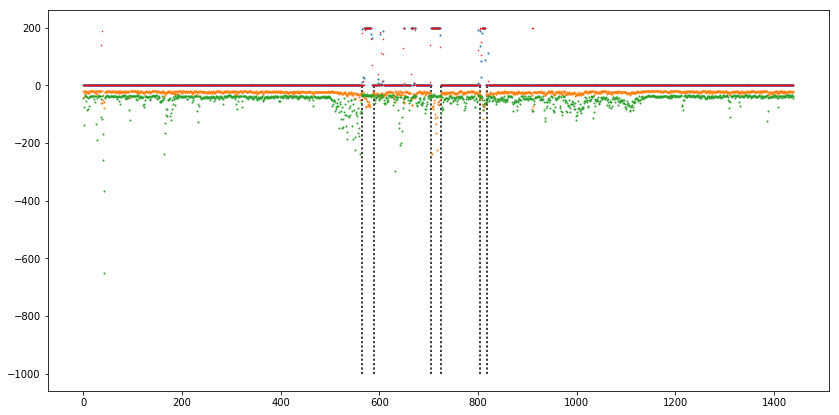

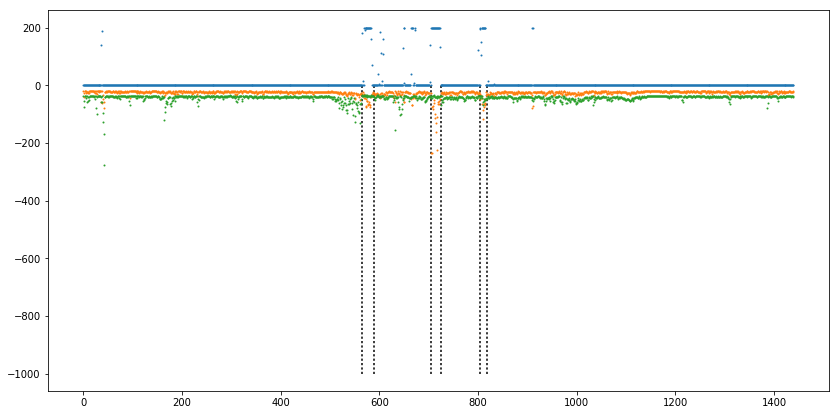

In [92]:
blank_bias = np.log(len(blanks)/(len(blanks)+len(seizures)))
seizure_bias = np.log(len(seizures)/(len(blanks)+len(seizures)))


b_LL = MVGD_LL(f_vec_d,blanks_mu,blanks_cov_i)+ blank_bias
s_LL = MVGD_LL(f_vec_d,seizures_mu,seizures_cov_i)+ seizure_bias
b_LLr = MVGD_LL(f_vec_d,blanks_mu,blanks_cov_ir) + blank_bias
s_LLr = MVGD_LL(f_vec_d,seizures_mu,seizures_cov_ir) + seizure_bias

LL = np.array([b_LL.T,s_LL.T]).T
p  = LL2prob(LL) 

LLr = np.array([b_LLr.T,s_LLr.T]).T
pr  = LL2prob(LLr) 

plt.figure(figsize=(14,7))
plt.plot(p[:,1]*200,'.',markersize=2)
plt.plot(pr[:,1]*200,'.',markersize=1,color = [1,0,0,1])
plt.plot(b_LL,'.',markersize=2)
plt.plot(s_LL,'.',markersize=2)
plt.vlines(starts[1:],-1000,0,linestyles=':')
plt.vlines(ends[1:],-1000,0,linestyles=':')
# plt.xlim(400,1000)

plt.figure(figsize=(14,7))
plt.plot(pr[:,1]*200,'.',markersize=2)
plt.plot(b_LLr,'.',markersize=2)
plt.plot(s_LLr,'.',markersize=2)
plt.vlines(starts[1:],-1000,0,linestyles=':')
plt.vlines(ends[1:],-1000,0,linestyles=':')
# plt.xlim(400,1000)

In [49]:
for eegfname in project.current_animal.eeg_files:
    fname = '.'.join(eegfname.split('.')[:-1]+['features'])
    f_vec = np.fromfile(fname,dtype='float64')
    f_vec_d = f_vec.reshape((-1,fe.number_of_features))
    
    b_LL = MVGD_LL(f_vec_d,blanks_mu,blanks_cov_i) + blank_bias
    s_LL = MVGD_LL(f_vec_d,seizures_mu,seizures_cov_i) + seizure_bias
    b_LLr = MVGD_LL(f_vec_d,blanks_mu,blanks_cov_i) + blank_bias
    s_LLr = MVGD_LL(f_vec_d,seizures_mu,seizures_cov_i) + seizure_bias

    LL = np.array([b_LL.T,s_LL.T]).T
    p  = LL2prob(LL) 

    LLr = np.array([b_LLr.T,s_LLr.T]).T
    pr  = LL2prob(LLr) 

    plt.figure(figsize=(14,7))
    plt.plot(p[:,1]*200,'.',markersize=2)
    plt.plot(pr[:,1]*200,'.',markersize=1,color = [1,0,0,1])
    plt.plot(b_LL,'.',markersize=2)
    plt.plot(s_LL,'.',markersize=2)
    plt.vlines(starts[1:],-1000,0,linestyles=':')
    plt.vlines(ends[1:],-1000,0,linestyles=':')
    plt.title(eegfname)
    # plt.xlim(400,1000)


NameError: name 'MVGD_LL' is not defined

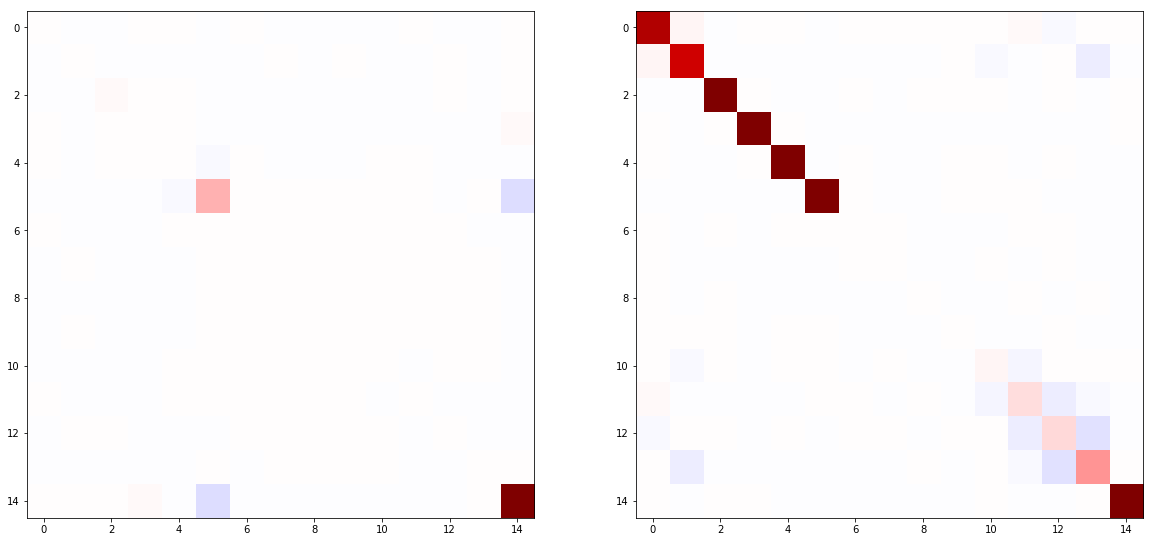

In [104]:
blanks_cov_i = np.linalg.inv(blanks_cov)
blanks_cov_ir = np.linalg.inv(blanks_cov+np.eye(len(blanks_cov))*np.mean(blanks_cov.diagonal())/len(blanks))
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(blanks_cov_i,cmap='seismic',vmin=-np.max(np.abs(blanks_cov_i)),vmax=np.max(np.abs(blanks_cov_i)))
plt.subplot(1,2,2)
plt.imshow(blanks_cov_ir,cmap='seismic',vmin=-np.max(np.abs(blanks_cov_ir)),vmax=np.max(np.abs(blanks_cov_ir)))

In [162]:
1/np.linalg.det(blanks_cov_i)

1.3922821808006248e-11

In [57]:
1/np.linalg.det(blanks_cov_ir)

1.6175683502327184e-11

In [127]:
30*24


720

In [152]:
w = (1000*2*np.pi)
m = 10

In [153]:

E = 1/2*m*r**2*w**2

NameError: name 'r' is not defined

In [154]:
np.sqrt(2*30000*3600/m/w**2)

0.7396853328737999

In [137]:
w

39478417.60435743

In [66]:
a = np.array([[-1,1],[1,2],[1,3]])

In [74]:
a[(a[:,0]>=0)& (a[:,1]<3),:]

array([[1, 2]])

In [69]:
for b in a:
    print(b)

[-1  1]
[1 2]
[1 3]


In [70]:
np.cov(a)

array([[2. , 1. , 2. ],
       [1. , 0.5, 1. ],
       [2. , 1. , 2. ]])

In [71]:
a

array([[-1,  1],
       [ 1,  2],
       [ 1,  3]])

In [79]:
b = np.array([1,0,3])

In [91]:
np.outer(b,)

TypeError: outer() missing 1 required positional argument: 'b'

In [90]:
b[:,np.newaxis]@b[np.newaxis,:]

array([[1, 0, 3],
       [0, 0, 0],
       [3, 0, 9]])